In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

# Configurar estilo do seaborn
sns.set(style="whitegrid")

Diferentes formas de carregar o conjunto de dados Iris

In [ ]:
'''
# Usando sklearn_datasets
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
'''
# Considerando uma url externa
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(url, header=None, names=col_names)

'''
# A partir de um csv
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

data = pd.read_csv("/gdrive/MyDrive/UFV/Ensino/2023-2/SIN 323 - IA/Pratica/Iris.csv") #/gdrive/MyDrive/Iris.csv
'''

'\n# A partir de um csv\nfrom google.colab import drive\ndrive.mount(\'/gdrive\')\n%cd /gdrive\n\ndata = pd.read_csv("/gdrive/MyDrive/UFV/Ensino/2023-2/SIN 323 - IA/Pratica/Iris.csv") #/gdrive/MyDrive/Iris.csv\n'

In [ ]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


Gerando algumas visualizações

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


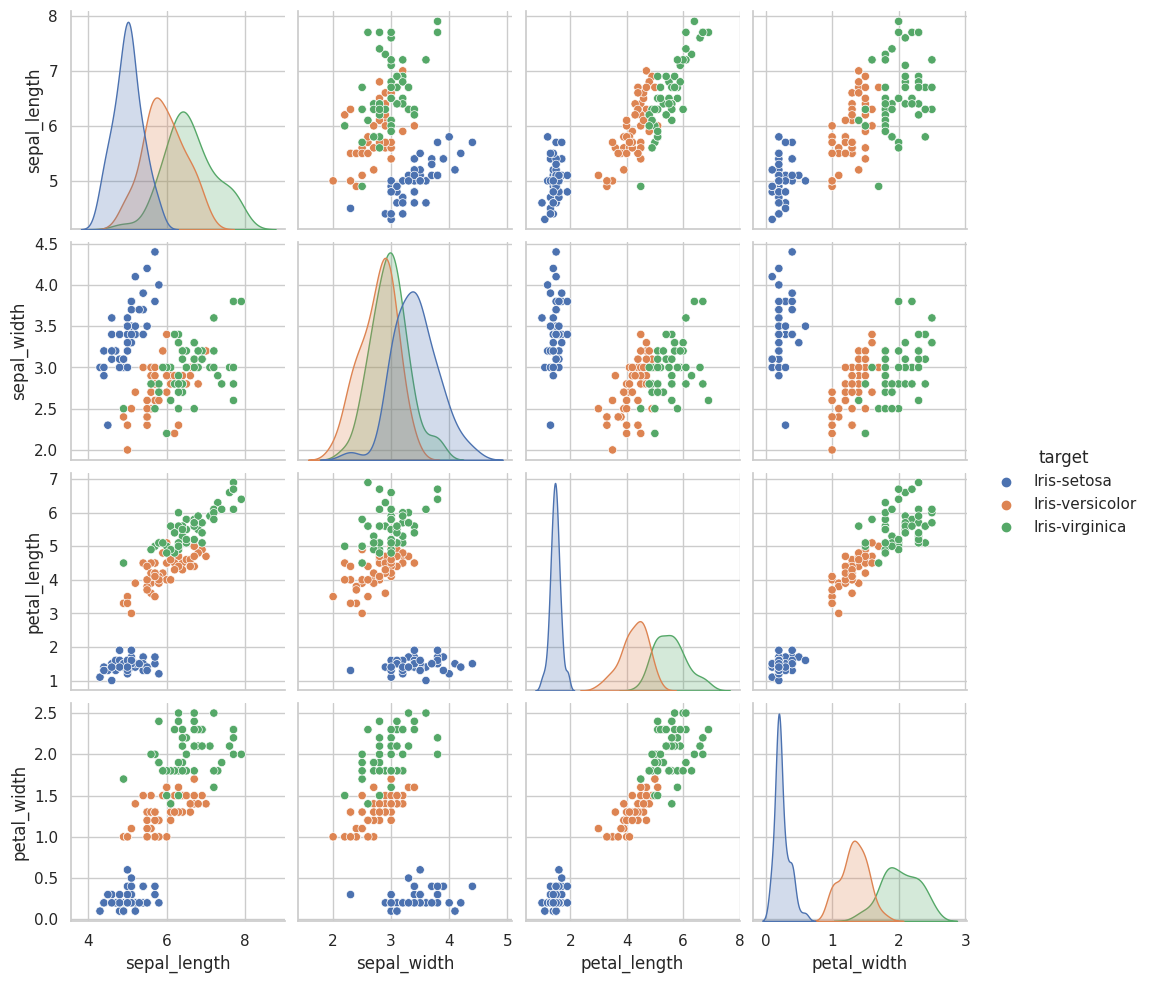

In [ ]:
# Visualizar as primeiras linhas do conjunto de dados
print(data.head())

# Visualizar informações estatísticas do conjunto de dados
print(data.describe())

# Visualizar relação entre as características usando pairplot
#sns.pairplot(data, hue='target')
#plt.show()

# Visualizar relação entre as características usando pairplot e considerando dados carregados do csv externo
data = data.rename(columns={'class': 'target'})

# Visualizar relação entre as características usando pairplot e considerando dados carregados do drive
#data = data.rename(columns={'Species': 'target'})

sns.pairplot(data, hue='target')
plt.show()

In [ ]:
# Dividir o conjunto de dados em características (X) e rótulos (y)
X = data.drop('target', axis=1)
y = data['target']

target_names = data["target"].unique()  # Para dataset em formato csv ou url externa

# Dividir em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Função para treinar e avaliar um modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Imprimir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'\nMatriz de Confusão - {model_name}:\n{conf_matrix}')

    # Imprimir o relatório de classificação
    class_report = classification_report(y_test, y_pred, target_names=target_names)

    # Para dados do sklearn
    #class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f'\nRelatório de Classificação - {model_name}:\n{class_report}\n')

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
train_and_evaluate(knn, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')

# Naive Bayes
nb = GaussianNB()
train_and_evaluate(nb, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes')

# SVM
svm = SVC(kernel='linear', C=1)
train_and_evaluate(svm, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM')

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
train_and_evaluate(mlp, X_train_scaled, y_train, X_test_scaled, y_test, 'MLP')

# Regressão Logística
logreg = LogisticRegression(max_iter=1000)
train_and_evaluate(logreg, X_train_scaled, y_train, X_test_scaled, y_test, 'Regressão Logística')



Matriz de Confusão - KNN:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de Classificação - KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Matriz de Confusão - Naive Bayes:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de Classificação - Naive Bayes:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00   

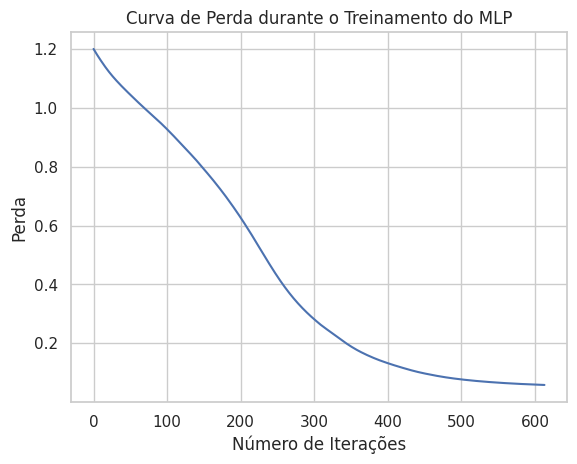

In [8]:
img = plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda durante o Treinamento do MLP")
plt.xlabel("Número de Iterações")
plt.ylabel("Perda")
plt.savefig('curva_treinamento_MLP.pdf')
plt.show()